In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [2]:
# reading data
X_train = pd.read_excel("data/training_data_antiAR.xlsx", index_col = 0, sheet_name="X_t")
X_test = pd.read_excel("data/validation_data_antiAR.xlsx", index_col = 0, sheet_name = "X_v")

y_train = pd.read_excel("data/training_data_antiAR.xlsx", index_col = 0, sheet_name="y_t")
y_test = pd.read_excel("data/validation_data_antiAR.xlsx", index_col = 0, sheet_name = "y_v")

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [3]:
# defining the model
model = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False
)

In [4]:
#fitting the model
model.fit(X_train, y_train)

LinearRegression()

## Cross validation

In [5]:
# leave-many-out

kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_lmo = cross_val_predict(model, X_train, y_train, cv=kf)

ss_res_lmo = np.sum((y_train - y_pred_lmo) ** 2)
ss_tot_lmo = np.sum((y_train - np.mean(y_train)) ** 2)

q2_lmo = 1 - (ss_res_lmo / ss_tot_lmo)
print(f"q2_LMO: {q2_lmo:.2f}")

q2_LMO: 0.88


In [6]:
# leave-one-out

loo = LeaveOneOut()

y_pred_loo = cross_val_predict(model, X_train, y_train, cv=loo)

ss_res_loo = np.sum((y_train - y_pred_loo) ** 2)
ss_tot_loo = np.sum((y_train - np.mean(y_train)) ** 2)

q2_loo = 1 - (ss_res_loo / ss_tot_loo)
print(f"Q² (Leave-One-Out): {q2_loo:.2f}")

Q² (Leave-One-Out): 0.87


## Train set stats

In [7]:
# TRAIN SET PRED
y_pred_train = model.predict(X_train)

# R²
r2_train = r2_score(y_train, y_pred_train)

# RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f"R² train set: {r2_train:.2f}")
print(f"RMSE train set: {rmse:.2f}")

R² train set: 0.90
RMSE train set: 0.38


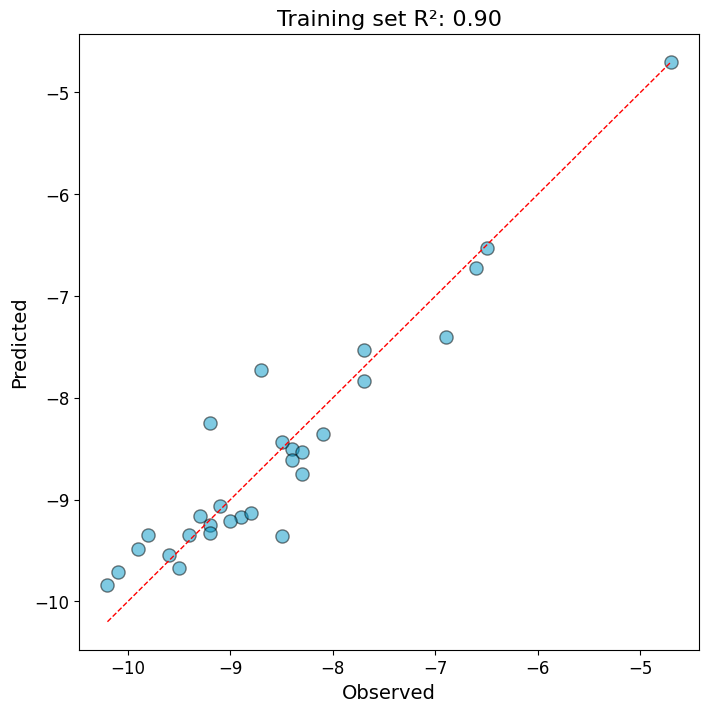

In [8]:
#Training set- pred vs obs values

plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_pred_train, alpha=0.5, s=90, color='#0096c7', edgecolors='black')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=1) 
plt.xlabel(r'Observed', fontsize=14)
plt.ylabel(r'Predicted', fontsize=14)
plt.title(f"Training set R²: {r2_train:.2f}", fontsize=16)
plt.grid(False) #color='lightgray', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

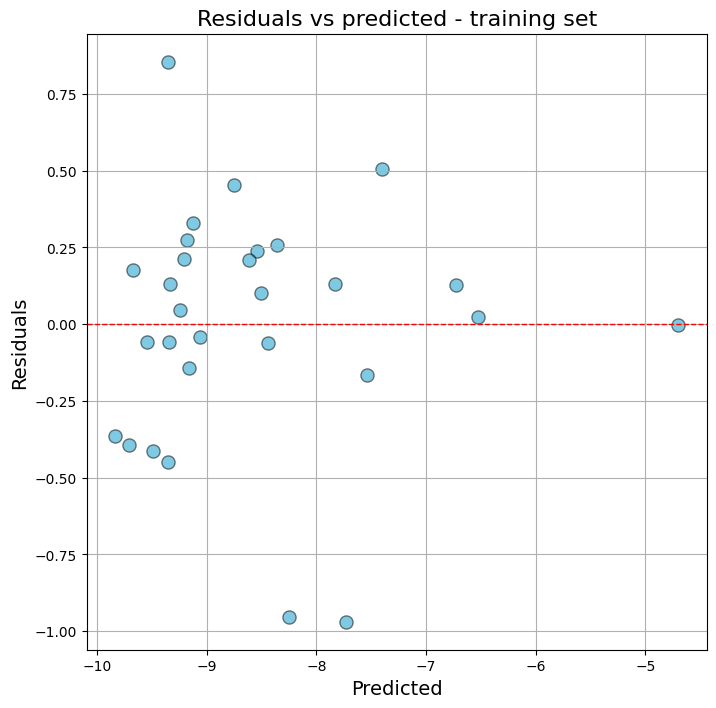

In [9]:
# Training set residuals vs predicted 

# calculate residuals
residuals_train = y_train - y_pred_train

# train set plot residuals vs pred
plt.figure(figsize=(8,8))

plt.scatter(y_pred_train, residuals_train, alpha=0.5, s=90, color='#0096c7', edgecolors='black')
plt.axhline(0, color='r', linestyle='--', lw=1)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.title('Residuals vs predicted - training set', fontsize=16)
plt.grid(True)

## Test set stats

In [10]:
# Test set pred
y_pred_test = model.predict(X_test)

# Metrics
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R² validation: {r2_test:.2f}")
print(f"RMSE validation: {rmse_test:.2f}")

R² validation: 0.84
RMSE validation: 0.41


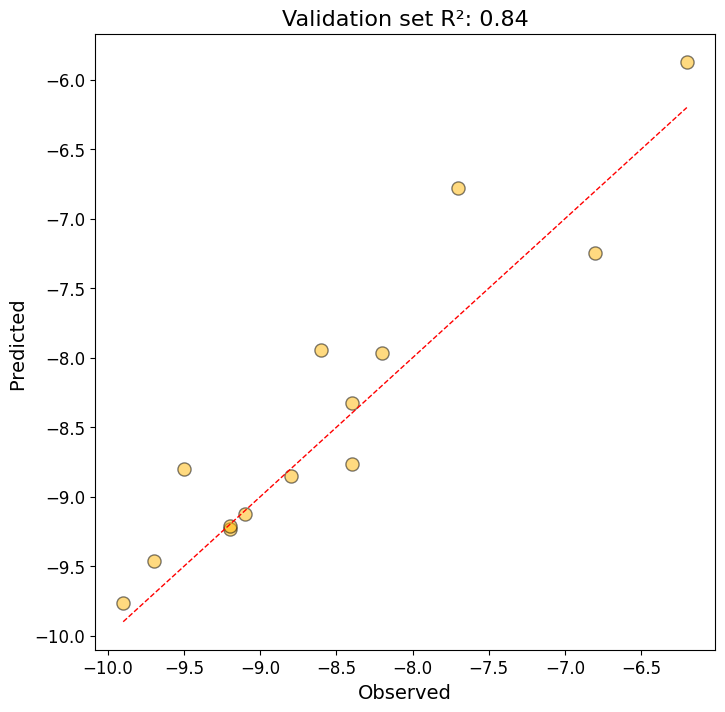

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_test, alpha=0.5, s=90, color='#ffb703', edgecolors='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=1)  # linia y=x
plt.xlabel(r'Observed', fontsize=14)
plt.ylabel(r'Predicted ', fontsize=14)
plt.title(f"Validation set R²: {r2_test:.2f}", fontsize=16)
plt.grid(False) #color='lightgray', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

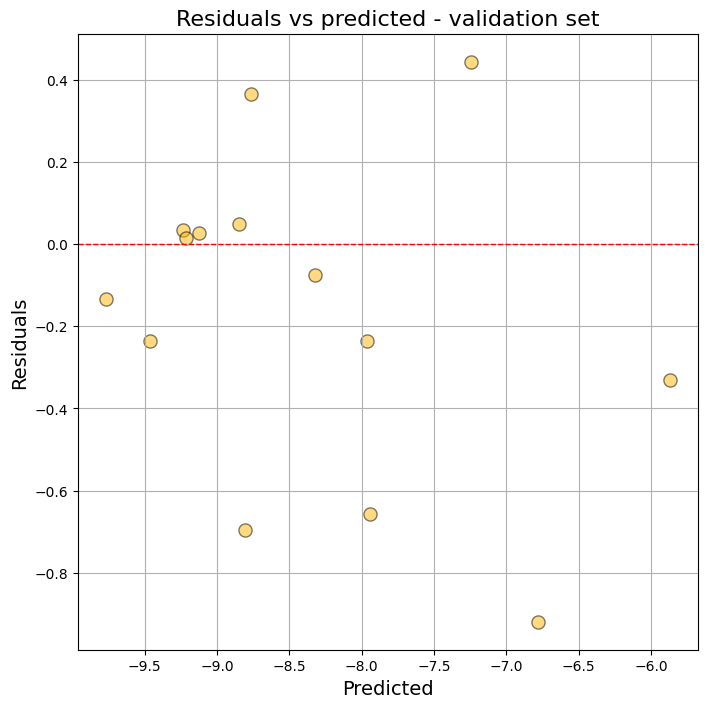

In [12]:
#residuals vs predicted plot
residuals_test = y_test - y_pred_test
 
#test set plot residuals vs predicted 
plt.figure(figsize=(8,8))
plt.scatter(y_pred_test, residuals_test, alpha=0.5, s=90, color='#ffb703', edgecolors='black')
plt.axhline(0, color='r', linestyle='--', lw=1)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.title('Residuals vs predicted - validation set', fontsize=16)
plt.grid(True)

In [13]:
intercept = model.intercept_
coef_1 = model.coef_[0]
coef_2 = model.coef_[1] 

print(f"Model equation:")
print(f"AR an BS = {intercept:.2f} + {coef_1:.2f} * AMW +{coef_2:.2f}* TPC")

Model equation:
AR an BS = 3.60 + -0.21 * AMW +-1.57* TPC


## ADDITIONAL STATS

In [14]:
# Q stats
y_train_mean = np.mean(y_train)
y_test_mean = np.mean(y_test)

# Q²F1
Q2_F1 = 1 - np.sum((y_test - y_pred_test)**2) / np.sum((y_test - y_train_mean)**2)

# Q²F2
Q2_F2 = 1 - np.sum((y_test - y_pred_test)**2) / np.sum((y_test - y_test_mean)**2)

# Q²F3
numerator = np.sum((y_test - y_pred_test)**2) / len(y_test)
denominator = np.sum((y_test - y_train_mean)**2) / len(y_train)
Q2_F3 = 1 - numerator / denominator

print("Q²F1 =", Q2_F1)
print("Q²F2 =", Q2_F2)
print("Q²F3 =", Q2_F3)

Q²F1 = 0.8411535692489929
Q²F2 = 0.8410992836368502
Q²F3 = 0.6709609648729138


In [15]:
def concordance_correlation_coefficient(y_true, y_pred):
    x = y_true
    y = y_pred
    n = len(x)

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    s_xy = np.sum((x - mean_x) * (y - mean_y))
    s_xx = np.sum((x - mean_x) ** 2)
    s_yy = np.sum((y - mean_y) ** 2)
    mean_diff_sq = n * (mean_x - mean_y) ** 2

    ccc = (2 * s_xy) / (s_xx + s_yy + mean_diff_sq)
    return ccc

In [16]:
ccc_train = concordance_correlation_coefficient(y_train, y_pred_train)
ccc_test = concordance_correlation_coefficient(y_test, y_pred_test)

print(f"Concordance Correlation Coefficient (Train): {ccc_train:.4f}")
print(f"Concordance Correlation Coefficient (Test): {ccc_test:.4f}")

Concordance Correlation Coefficient (Train): 0.9455
Concordance Correlation Coefficient (Test): 0.9251


## APPLICABILITY DOMAIN

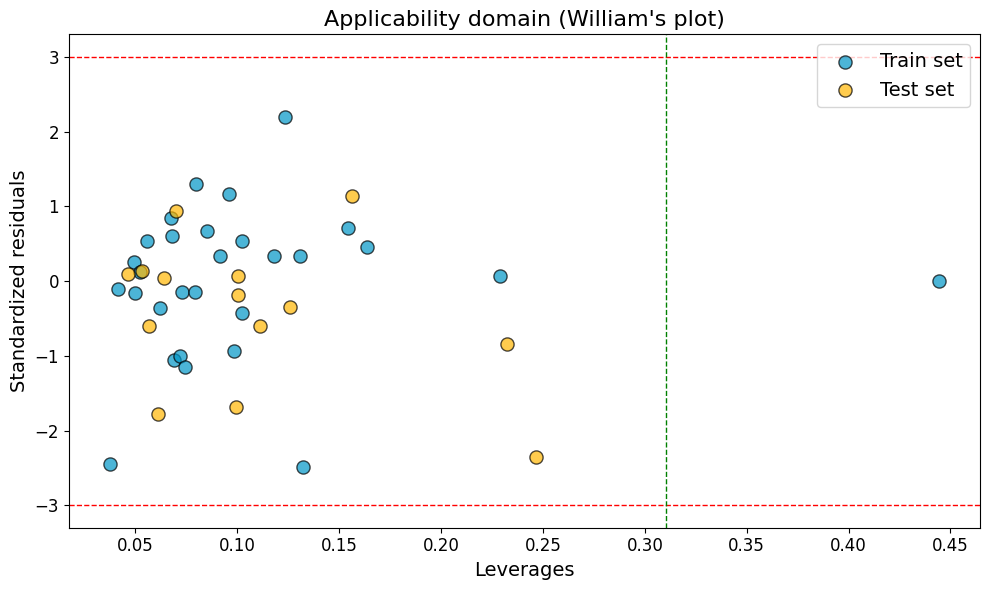

Test set - out of domain
  Outliers (|resid| > 3): []
  Influential (hi > h*): []


In [17]:
std_res_train = residuals_train / np.std(residuals_train, ddof=1)
std_res_test = residuals_test / np.std(residuals_train, ddof=1)

# === Training ===
X_aug_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
H_train = X_aug_train @ np.linalg.inv(X_aug_train.T @ X_aug_train) @ X_aug_train.T
leverage_train = np.diagonal(H_train)

# === Test ===
# h_i(test) = xᵢᵗ (XᵗX)⁻¹ xᵢ
X_aug_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
hat_matrix_core = np.linalg.inv(X_aug_train.T @ X_aug_train)
leverage_test = np.sum(X_aug_test @ hat_matrix_core * X_aug_test, axis=1)

# === h* threshold ===
n, p = X_aug_train.shape
h_star = 3 * p / n

# === William's Plot ===
plt.figure(figsize=(10, 6))

# training points
plt.scatter(leverage_train, std_res_train, label='Train set', alpha = 0.7, facecolors='#0096c7', edgecolors='k', s=90)

# test points
plt.scatter(leverage_test, std_res_test, label='Test set', alpha = 0.7, facecolors='#ffb703', edgecolors='k', s=90)

plt.axhline(y=3, color='red', linestyle='--', lw = 1)
plt.axhline(y=-3, color='red', linestyle='--', lw = 1)
plt.axvline(x=h_star, color='green', linestyle='--', lw = 1)

plt.xlabel('Leverages', fontsize = 14)
plt.ylabel('Standardized residuals', fontsize = 14)
plt.title("Applicability domain (William's plot)", fontsize = 16)
plt.legend(fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(False) 
plt.tight_layout()
plt.show()

# === Points out of domain ===
outlier_test_idx = np.where(np.abs(std_res_test) > 3)[0]
influential_test_idx = np.where(leverage_test > h_star)[0]

print("Test set - out of domain")
print(f"  Outliers (|resid| > 3): {outlier_test_idx}")
print(f"  Influential (hi > h*): {influential_test_idx}")

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Optimal alpha for Ridge: 0.2009
Optimal alpha for Lasso: 0.0010
Optimal alpha for ElasticNet: 0.0010


/Users/alicjawojciechowska/Documents/GitHub/ISL_model_antiAR/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


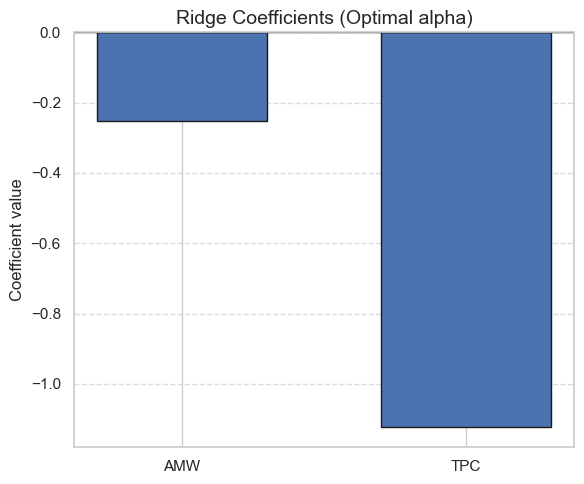

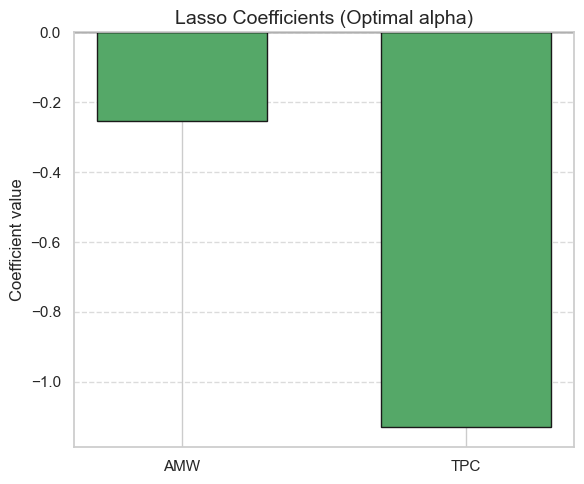

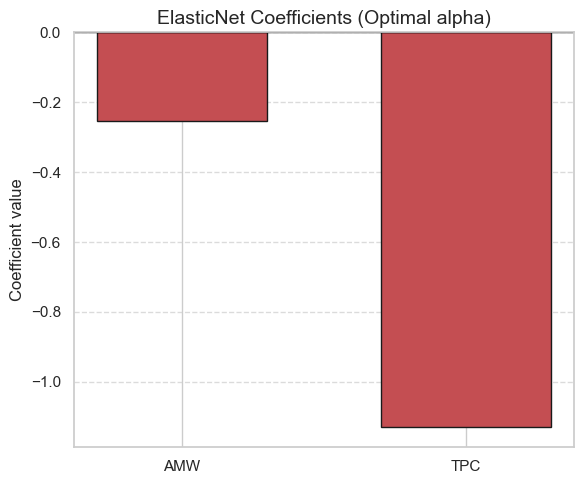

In [19]:
sns.set(style="whitegrid")

# Define alpha
alphas_ridge = np.logspace(-3, 3, 100)   # od 0.001 do 1000
alphas_lasso = np.logspace(-3, 1, 100)   # od 0.001 do 10
alphas_elastic = np.logspace(-3, 1, 100)

# --- Ridge ---
ridge_cv = RidgeCV(alphas=alphas_ridge, store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)
print(f"Optimal alpha for Ridge: {ridge_cv.alpha_:.4f}")

# --- Lasso ---
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42, max_iter=5000)
lasso_cv.fit(X_train_scaled, y_train)
print(f"Optimal alpha for Lasso: {lasso_cv.alpha_:.4f}")

# --- ElasticNet ---
elastic_cv = ElasticNetCV(alphas=alphas_elastic, l1_ratio=0.5, cv=5, random_state=42, max_iter=5000)
elastic_cv.fit(X_train_scaled, y_train)
print(f"Optimal alpha for ElasticNet: {elastic_cv.alpha_:.4f}")

# coef
features = ["AMW", "TPC"]
coefs = {
    "Ridge": ridge_cv.coef_,
    "Lasso": lasso_cv.coef_,
    "ElasticNet": elastic_cv.coef_
}

model_colors = {"Ridge": "#4c72b0", "Lasso": "#55a868", "ElasticNet": "#c44e52"}

# --- Plots ---
for model_name in ["Ridge", "Lasso", "ElasticNet"]:
    plt.figure(figsize=(6,5))
    plt.bar(features, coefs[model_name], color=model_colors[model_name], edgecolor='k', width=0.6)
    plt.axhline(0, color="black", linewidth=1)
    plt.ylabel("Coefficient value", fontsize=12)
    plt.title(f"{model_name} Coefficients (Optimal alpha)", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


## PICKLE TEST

In [20]:
#safe pickle file
with open('model_ARan.pkl', 'wb') as file:
    pickle.dump(model, file)

In [21]:
# read pickle file
with open('model_ARan.pkl', 'rb') as file:
    model_test = pickle.load(file)

In [22]:
train_pred_pickle = model_test.predict(X_train)
test_pred_pickle = model_test.predict(X_test)

In [23]:
df_preds = pd.DataFrame({
    'pred_test_set': pd.Series(test_pred_pickle),
    "pred_org_test": y_pred_test
})

df_preds.head(10)

,pred_test_set,pred_org_test
0,-6.780724,-6.780724
1,-7.942105,-7.942105
2,-8.804571,-8.804571
3,-9.234681,-9.234681
4,-8.766129,-8.766129
5,-9.127893,-9.127893
6,-7.963429,-7.963429
7,-9.214386,-9.214386
8,-9.767235,-9.767235
9,-8.849784,-8.849784


In [24]:
# Calculate basic metrics
r2_test_pcl = r2_score(y_test, test_pred_pickle)
rmse_test_pcl = np.sqrt(mean_squared_error(y_test, test_pred_pickle))

print(f"R² validation: {r2_test:.2f}")
print(f"RMSE validation: {rmse_test:.2f}")

R² validation: 0.84
RMSE validation: 0.41
